In [1]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import BatchNormalization
from keras import regularizers
from keras.optimizers import Adam

In [5]:
#Importing dataset and face detector
dataset_folder='Documents/dataset/dataset'
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [6]:
from keras.preprocessing.image import ImageDataGenerator
#preprocessing
train_datagen1 = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   rotation_range=30,
                                   width_shift_range=0.1,
                                   # randomly shift images vertically
                                   height_shift_range=0.1,
                                   horizontal_flip=True,
                                   vertical_flip=False,
                                   fill_mode='nearest',
                                   validation_split = 0.2,
                                   )

test_datagen1 = ImageDataGenerator(rescale=1./255,
                                  validation_split = 0.2)

# Extract features for each image
training_set1 = train_datagen1.flow_from_directory(dataset_folder,
                                       target_size=(160, 160),
                                                batch_size=32,
                                       color_mode='grayscale',
                                     class_mode='categorical',
                                            subset='training')

validation_set1 = test_datagen1.flow_from_directory(dataset_folder,
                                        target_size=(160, 160),
                                                 batch_size=32,
                                      class_mode='categorical',
                                        color_mode='grayscale',
                                               shuffle = False,
                                           subset='validation')

# Display the number of images being augmented during validation
print("Number of images being augmented for validation:", len(validation_set1))
print("Number of images being augmented for training:", len(training_set1))

Found 896 images belonging to 20 classes.
Found 217 images belonging to 20 classes.
Number of images being augmented for validation: 7
Number of images being augmented for training: 28


In [7]:
# Define the model architecture
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(160, 160, 1)),
    Dropout(0.1),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(20, activation='softmax', kernel_regularizer=regularizers.l2(0.09))
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0009), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 158, 158, 32)      320       
                                                                 
 dropout (Dropout)           (None, 158, 158, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 79, 79, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 77, 77, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 36, 36, 128)       7

In [10]:
# Assuming training_set1 contains input images and target_labels contains corresponding labels
hist = model.fit(training_set1,
                 steps_per_epoch=len(training_set1),
                 epochs=120,
                 verbose=1,
                 validation_data=validation_set1,
                 validation_steps=len(validation_set1))

Epoch 1/120
28/28 [==============================] - 33s 1s/step - loss: 5.8621 - accuracy: 0.0670 - val_loss: 5.3490 - val_accuracy: 0.0737
Epoch 2/120
28/28 [==============================] - 35s 1s/step - loss: 4.9099 - accuracy: 0.0960 - val_loss: 4.6747 - val_accuracy: 0.0645
Epoch 3/120
28/28 [==============================] - 35s 1s/step - loss: 4.2600 - accuracy: 0.1451 - val_loss: 4.1931 - val_accuracy: 0.1014
Epoch 4/120
28/28 [==============================] - 37s 1s/step - loss: 3.7680 - accuracy: 0.1775 - val_loss: 3.8311 - val_accuracy: 0.1060
Epoch 5/120
28/28 [==============================] - 34s 1s/step - loss: 3.3840 - accuracy: 0.1964 - val_loss: 3.5848 - val_accuracy: 0.1198
Epoch 6/120
28/28 [==============================] - 34s 1s/step - loss: 3.0874 - accuracy: 0.2310 - val_loss: 3.4260 - val_accuracy: 0.0783
Epoch 7/120
28/28 [==============================] - 33s 1s/step - loss: 2.9011 - accuracy: 0.2400 - val_loss: 3.2572 - val_accuracy: 0.2258
Epoch 8/120
2

7/7 [==============================] - 5s 669ms/step


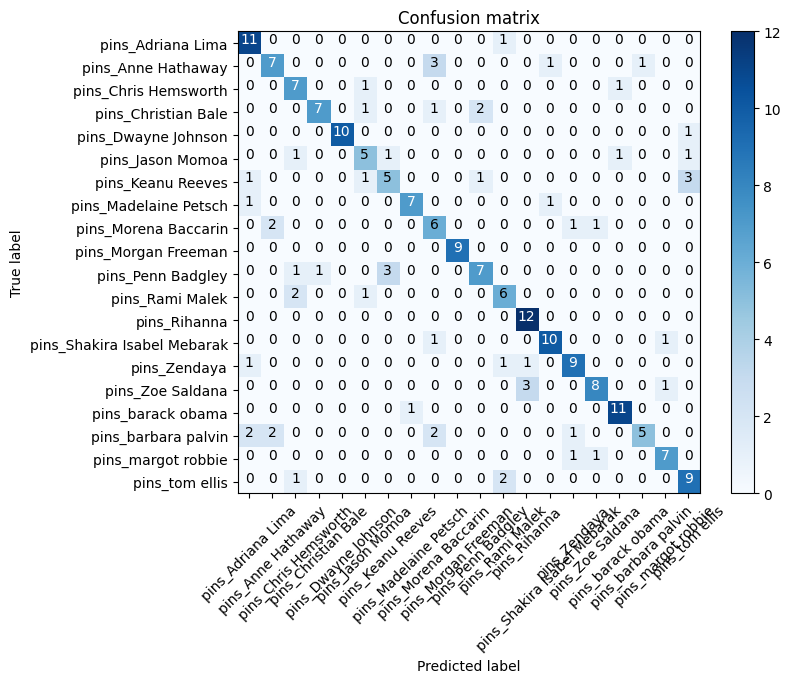

Accuracy: 0.728110599078341
Precision: 0.7402349826312961
Recall: 0.728110599078341
False Positive Rate: [0.02439024 0.0195122  0.02403846 0.00485437 0.         0.01923077
 0.01941748 0.00480769 0.03381643 0.         0.01463415 0.01923077
 0.0195122  0.0097561  0.01463415 0.0097561  0.0097561  0.00487805
 0.00961538 0.02439024]
False Negative Rate: [0.08333333 0.41666667 0.22222222 0.36363636 0.09090909 0.44444444
 0.54545455 0.22222222 0.4        0.         0.41666667 0.33333333
 0.         0.16666667 0.25       0.33333333 0.08333333 0.58333333
 0.22222222 0.25      ]
Confusion Matrix:
[[11  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0  0  3  0  0  0  0  1  0  0  0  1  0  0]
 [ 0  0  7  0  0  1  0  0  0  0  0  0  0  0  0  0  1  0  0  0]
 [ 0  0  0  7  0  1  0  0  1  0  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 10  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0  0  1  0  0  5  1  0  0  0  0  0  0  0  0  0  1  0  0  1]
 [ 1  0  0  0  0  1  5  0  0

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score, classification_report, confusion_matrix

# Make predictions on the validation set
Y_pred = model.predict(validation_set1)
y_pred = np.argmax(Y_pred, axis=1)

# Extract ground truth labels
y_true = validation_set1.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred)

# Calculate precision
precision = precision_score(y_true, y_pred, average='weighted')

# Calculate recall
recall = recall_score(y_true, y_pred, average='weighted')

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred)

# Calculate false positive rate and false negative rate
FP = conf_matrix.sum(axis=0) - np.diag(conf_matrix)
FN = conf_matrix.sum(axis=1) - np.diag(conf_matrix)
TP = np.diag(conf_matrix)
TN = conf_matrix.sum() - (FP + FN + TP)

false_positive_rate = FP / (FP + TN)
false_negative_rate = FN / (FN + TP)

# Plot confusion matrix with numbers
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(len(validation_set1.class_indices))
plt.xticks(tick_marks, validation_set1.class_indices, rotation=45)
plt.yticks(tick_marks, validation_set1.class_indices)
plt.xlabel('Predicted label')
plt.ylabel('True label')

# Add numbers on top of each cell
thresh = conf_matrix.max() / 2.
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(j, i, format(conf_matrix[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if conf_matrix[i, j] > thresh else "black")

plt.show()

# Display metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)
print("Confusion Matrix:")
print(conf_matrix)

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred))


In [12]:
print("Precision:", np.round(precision,2))
print("Recall:", np.round(recall,2))
print("False Positive Rate (FPR):", np.round(false_positive_rate,2))
print("False Negative Rate (FNR):", np.round(false_negative_rate,2))

Precision: 0.74
Recall: 0.73
False Positive Rate (FPR): [0.02 0.02 0.02 0.   0.   0.02 0.02 0.   0.03 0.   0.01 0.02 0.02 0.01
 0.01 0.01 0.01 0.   0.01 0.02]
False Negative Rate (FNR): [0.08 0.42 0.22 0.36 0.09 0.44 0.55 0.22 0.4  0.   0.42 0.33 0.   0.17
 0.25 0.33 0.08 0.58 0.22 0.25]


In [13]:
# Calculate average precision, recall, FPR, FNR
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
mean_FPR = np.mean(false_positive_rate)
mean_FNR = np.mean(false_negative_rate)

print("Average Precision:",  np.round(avg_precision,2))
print("Average Recall:", np.round(avg_recall,2))
print("Mean False Positive Rate (FPR):", np.round(mean_FPR,2))
print("Mean False Negative Rate (FNR):", np.round(mean_FNR,2))

Average Precision: 0.74
Average Recall: 0.73
Mean False Positive Rate (FPR): 0.01
Mean False Negative Rate (FNR): 0.27


In [14]:
from sklearn.metrics import confusion_matrix

# Assume you have the true labels (y_true) and predicted labels (y_pred) for the validation set
y_true = validation_set1.classes  # Get true labels from validation set
y_pred = model.predict(validation_set1)  # Get predicted labels
y_pred = np.argmax(y_pred, axis=1)  # Convert to class indices

# Calculate confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Get indices of misclassified samples
misclassified_indices = np.where(y_true != y_pred)

7/7 [==============================] - 3s 331ms/step


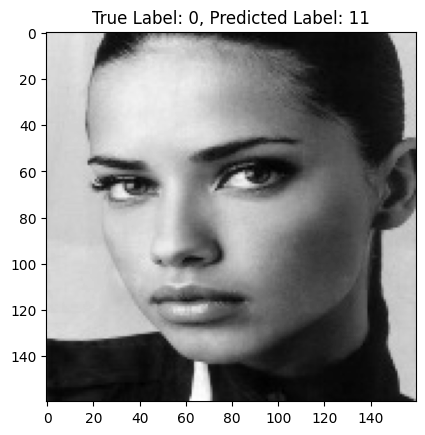

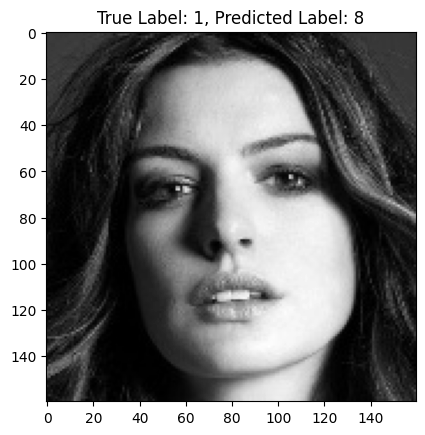

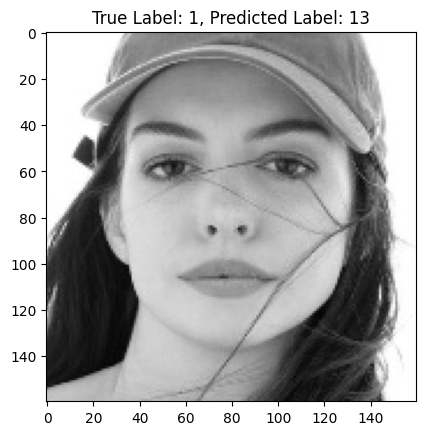

KeyboardInterrupt: 

In [15]:
for idx in misclassified_indices[0]:
    # Load the misclassified image
    img_path = validation_set1.filepaths[idx]
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    
    # Display the image
    plt.imshow(img, cmap='gray')
    plt.title(f"True Label: {y_true[idx]}, Predicted Label: {y_pred[idx]}")
    plt.show()

In [ ]:
# Load the pre-trained cascade classifier for frontal face detection
face_cascade_path = cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
face_cascade = cv2.CascadeClassifier(str(face_cascade_path))

# Initialize video capture
cap = cv2.VideoCapture(0)

while True:
    # Capture each frame
    state, frame = cap.read()

    # Convert frame to grayscale for face detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the frame
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    # Process each face detected in the frame
    for (x, y, w, h) in faces:
        # Extract the face from the frame
        face = gray[y:y + h, x:x + w]

        # Resize the face to the required dimensions
        face = cv2.resize(face, (160, 160))

        # Normalize the data
        face = face.astype('float32') / 255

        # Make a prediction using the trained model
        result = model.predict(face.reshape(1, 160, 160, 1))

        # Get the label with the highest probability
        label_index = np.argmax(result)
        predicted_class_name = class_names[label_index]

        # Display the label on the frame
        if np.max(label_index) > 10:
            cv2.putText(frame, f"{predicted_class_name}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
        else:
            # Label the face as "Unknown"
            cv2.putText(frame, "Unknown", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 0, 255), 2)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 2)

    # Display the resulting frame
    cv2.imshow("Attendance - to quit press ESC", frame)

    # Exit with ESC
    key = cv2.waitKey(1)
    if key == 27:  # ESC key
        break

cap.release()
cv2.destroyAllWindows()
